# Perancangan Mesin Pemberian Makan Kucing Menggunakan Fuzzy Logic

Nama : Rosa Julia Erizka

NIM : 09011282126105

In [1]:
#Memanggil library/package yang digunakan
import numpy as np 
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 
import matplotlib.pyplot as plt 
%matplotlib inline 

# 1. Fuzzyfikasi

## Variabel input ( Antecedent):
1. Berat Badan : ringan, sedang, berat.
2. Sisa Pakan: habis, tersisa sedikit, dan tidak habis.

## Variabel Output (Consequent):
1. Porsi Pakan : sedikit, sedang, dan banyak.

In [2]:
# Variabel input: 
berat_badan = ctrl.Antecedent(np.arange(0, 6, 1), 'berat_badan')
sisa_pakan = ctrl.Antecedent(np.arange(0, 7, 1), 'sisa_pakan')
# Variabel output: 
porsi_pakan = ctrl.Consequent(np.arange(0, 9, 1), 'porsi_pakan')

### Deklarasi usia sebagai Variabel Input 1 

Fungsi Keanggotaan Inputan berat_badan

$Berat Badan [ringan] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 1.3 \\
       {1.3-x \over 1.3-1.1} & \mbox{; } 1.1 ≤ x ≤ 1.3 \\
       1 & \mbox{; } x ≤ 1.1
    \end{array}
\right.$

$Berat Badan [Sedang] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 1.1 \ atau \ x \geq 3 \\
       {x-1.1 \over 1.3-1.1} & \mbox{; } 1.1 ≤ x ≤ 1.3 \\
       1 & \mbox{; } 1.3 ≤ x ≤ 2.8\\
       {3-x \over 3-2.8} & \mbox{; } 2.8 ≤ x ≤ 3 \\
    \end{array}
\right.$

$Berat Badan [Berat] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 2.8 \\
       {x-2.8 \over 3-2.8} & \mbox{; }2.8 ≤ x ≤ 3 \\
       1 & \mbox{; } x \geq 3
    \end{array}
\right.$

### Deklarasi Sisa Pakan sebagai Variabel Input 2 

Fungsi Keanggotaan Inputan Sisa_Pakan

$Sisa Pakan [habis] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 1 \\
       {x-0 \over 1-0} & \mbox{; } 0 ≤ x ≤ 1 \\
       1 & \mbox{; } x ≤ 1
    \end{array}
\right.$

$Sisa Pakan [tersisa sedikit] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 0 \ atau \ x \geq 4 \\
       {x-0 \over 1-0} & \mbox{; } 0 ≤ x ≤ 1 \\
       1 & \mbox{; } 1 ≤ x ≤ 3\\
       {4-x \over 4-3} & \mbox{; } 3 ≤ x ≤ 4 \\
    \end{array}
\right.$

$Sisa Pakan [tidak habis] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 3 \\
       {x-3 \over 4-3} & \mbox{; } 3 ≤ x ≤ 4 \\
       1 & \mbox{; } x \geq 5
    \end{array}
\right.$

### Deklarasi Sisa Pakan sebagai Variabel Output 

Fungsi Keanggotaan Outputan Porsi_Pakan

$Porsi Pakan [sedikit] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 4 \\
       {4-x \over 4-3} & \mbox{; } 3 ≤ x ≤ 4 \\
       1 & \mbox{; } x ≤ 3
    \end{array}
\right.$

$Porsi Pakan [sedang] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 3 \ atau \ x \geq 7 \\
       {x-3 \over 4-3} & \mbox{; } 3 ≤ x ≤ 4 \\
       1 & \mbox{; } 4 ≤ x ≤ 6\\
       {7-x \over 7-6} & \mbox{; } 6 ≤ x ≤ 7 \\
    \end{array}
\right.$

$Porsi Pakan [banyak] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 6 \\
       {x-6 \over 7-6} & \mbox{; } 4 ≤ x ≤ 5 \\
       1 & \mbox{; } x \geq 7
    \end{array}
\right.$

In [3]:
#Deklarasikan masing-masing parameter dari variabel

#usia
berat_badan['ringan'] = fuzz.trapmf(berat_badan.universe, [0, 0, 1.1, 1.3])
berat_badan['sedang'] = fuzz.trapmf(berat_badan.universe, [1.1, 1.3, 2.8, 3])
berat_badan['berat'] = fuzz.trapmf(berat_badan.universe, [2.8,3, 6, 6])

#sisa_pakan
sisa_pakan['habis'] = fuzz.trimf(sisa_pakan.universe, [0, 0, 1])
sisa_pakan['tersisa_sedikit'] = fuzz.trapmf(sisa_pakan.universe, [0, 1, 3, 4])
sisa_pakan['tidak_habis'] = fuzz.trapmf(sisa_pakan.universe, [3, 4, 6, 7])

#porsi_pakan
porsi_pakan['sedikit'] = fuzz.trapmf(porsi_pakan.universe, [0, 0, 3, 4])
porsi_pakan['sedang'] = fuzz.trapmf(porsi_pakan.universe, [3, 4, 6, 7])
porsi_pakan['banyak'] = fuzz.trapmf(porsi_pakan.universe, [6, 7, 8, 10])

In [4]:
## Grafik Tiap Variabel :

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


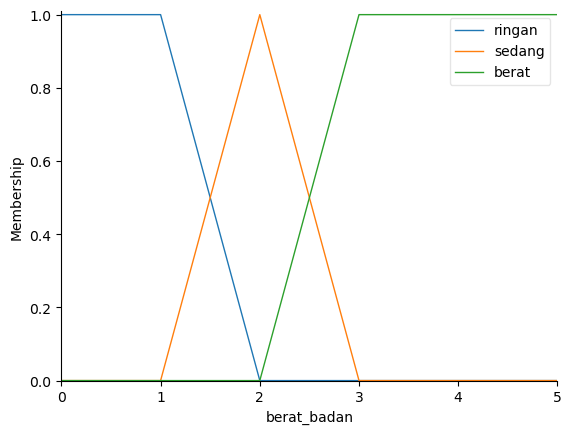

In [5]:
berat_badan.view();

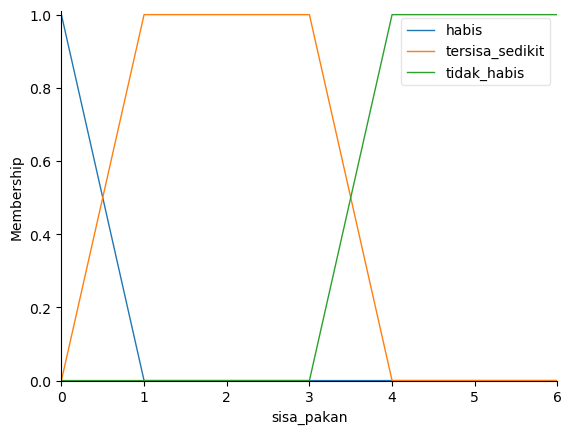

In [6]:
sisa_pakan.view(); 

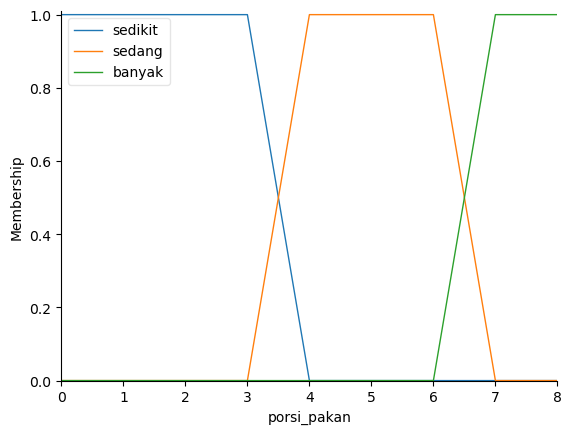

In [7]:
porsi_pakan.view(); 

## RULE BASE
Pada kasus ini terdapat 9 rule base seperti pada tabel dibawah ini

| No |    BERAT BADAN   | SISA PAKAN  | PORSI PAKAN      |
|----|-----------|-------------|-------------|
| 1  |   ringan  |   habis    |   banyak      |
| 2  |   ringan  |   tersisa_sedikit    |   sedang     |
| 3  |   ringan  |   tidak_habis     |   sedikit    |
| 4  |   sedang  |   habis    |   banyak      |
| 5  |   sedang  |   tersisa_sedikit    |   sedang     |
| 6  |   sedang  |   tidak_habis     |   banyak    |
| 7  |   berat   |   habis    |   sedikit      |
| 8  |   berat   |   tersisa_sedikit    |   sedang     |
| 9  |   berat   |   tidak_habis     |   banyak    |

(<Figure size 640x480 with 1 Axes>, <Axes: >)

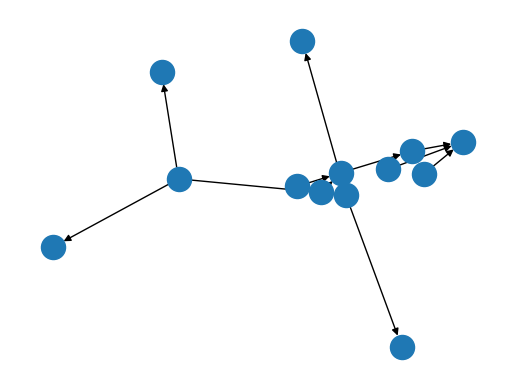

In [8]:
#Rule base

rule1= ctrl.Rule(berat_badan['ringan'] & sisa_pakan['habis'], porsi_pakan['banyak'])
rule2= ctrl.Rule(berat_badan['ringan'] & sisa_pakan['tersisa_sedikit'], porsi_pakan['sedang'])
rule3= ctrl.Rule(berat_badan['ringan'] & sisa_pakan['tidak_habis'], porsi_pakan['sedikit'])

rule4= ctrl.Rule(berat_badan['sedang'] & sisa_pakan['habis'], porsi_pakan['banyak'])
rule5= ctrl.Rule(berat_badan['sedang'] & sisa_pakan['tersisa_sedikit'], porsi_pakan['sedang'])
rule6= ctrl.Rule(berat_badan['sedang'] & sisa_pakan['tidak_habis'], porsi_pakan['sedikit'])

rule7= ctrl.Rule(berat_badan['berat'] & sisa_pakan['habis'], porsi_pakan['sedang'])
rule8= ctrl.Rule(berat_badan['berat'] & sisa_pakan['tersisa_sedikit'], porsi_pakan['sedikit'])
rule9= ctrl.Rule(berat_badan['berat'] & sisa_pakan['tidak_habis'], porsi_pakan['banyak'])

rule1.view()

# 2. Fuzzy Inference
Metode Mamdani

In [9]:
#Membuat kontrol sistem yang kondisinya diambil berdasarkan aturan atau rule yang telah dibuat
porsi_pakan_rule1= ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

In [10]:
#Membuat simulasi kontrolsistem yang kondisinya diambil berdasarkan durasi_rule1 /sistem kontrol yang telah kita buat
porsi = ctrl.ControlSystemSimulation(porsi_pakan_rule1)

# 3. Defuzzyfikasi

In [11]:
#Membuat interupsi inputan dari keyboard
Berat_Kucing = input("Berat kucing adalah :")
Sisa = input("Sisa Pakan adalah:")

Berat kucing adalah :2
Sisa Pakan adalah:3


In [12]:
print(Berat_Kucing)
print(Sisa)

2
3


### Perhitungan COG (Centre of Gravity

terdapat kucing dengan berat 2 KG menyisakan makanan sebanyak 3 gram, maka respon dari pet feeder akan mengeluarkan prosi makan seperti apa?

1. $Input.BERAT[2] =
\left\{
    \begin{array}{ll}
       {2-1.1 \over 1.3-1.1} = 4.5 \\
       {3-2 \over 3-2.8} = 5 \\
    \end{array}
\right.$



2. $Input.SISA PAKAN[3] =
\left\{
    \begin{array}{ll}
       {3-0 \over 1-0} = 3 \\
       {4-3 \over 4-3} = 1\\
    \end{array}
\right.$

In [13]:
porsi.input['berat_badan']= float(Berat_Kucing) #mengubah tipe daya menjadi float
porsi.input['sisa_pakan']= float(Sisa)

porsi.compute() #menghitung jumlah porsi

In [14]:
print(porsi.output['porsi_pakan']) 

4.999999999999999


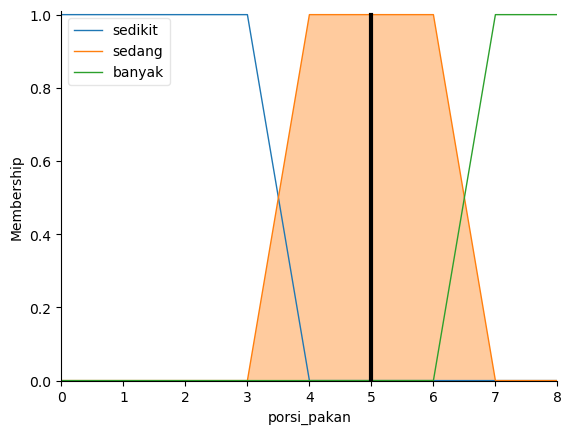

In [15]:
porsi_pakan.view(sim=porsi)